<a href="https://colab.research.google.com/github/AshishGusain17/via_google_colab/blob/master/sentiment_analysis_glove_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-07-21 08:58:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-07-21 08:58:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-07-21 08:58:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [6]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [12]:
with open("/content/glove.6B.300d.txt","r") as f:
    print()
    ct=0
    for i in f.readlines():
        ct=ct+1
        print(i)
        print(len(i.split()))
        if ct==10:
            break



the 0.04656 0.21318 -0.0074364 -0.45854 -0.035639 0.23643 -0.28836 0.21521 -0.13486 -1.6413 -0.26091 0.032434 0.056621 -0.043296 -0.021672 0.22476 -0.075129 -0.067018 -0.14247 0.038825 -0.18951 0.29977 0.39305 0.17887 -0.17343 -0.21178 0.23617 -0.063681 -0.42318 -0.11661 0.093754 0.17296 -0.33073 0.49112 -0.68995 -0.092462 0.24742 -0.17991 0.097908 0.083118 0.15299 -0.27276 -0.038934 0.54453 0.53737 0.29105 -0.0073514 0.04788 -0.4076 -0.026759 0.17919 0.010977 -0.10963 -0.26395 0.07399 0.26236 -0.1508 0.34623 0.25758 0.11971 -0.037135 -0.071593 0.43898 -0.040764 0.016425 -0.4464 0.17197 0.046246 0.058639 0.041499 0.53948 0.52495 0.11361 -0.048315 -0.36385 0.18704 0.092761 -0.11129 -0.42085 0.13992 -0.39338 -0.067945 0.12188 0.16707 0.075169 -0.015529 -0.19499 0.19638 0.053194 0.2517 -0.34845 -0.10638 -0.34692 -0.19024 -0.2004 0.12154 -0.29208 0.023353 -0.11618 -0.35768 0.062304 0.35884 0.02906 0.0073005 0.0049482 -0.15048 -0.12313 0.19337 0.12173 0.44503 0.25147 0.10781 -0.17716 0.038

In [127]:
embeddings_index["hey"]

array([ 0.37766  ,  0.42608  ,  1.158    , -0.66077  , -0.56281  ,
        0.40902  ,  0.024335 ,  0.67835  ,  0.20989  , -0.58593  ,
        0.60217  ,  0.42907  ,  0.022733 ,  0.069016 ,  0.38048  ,
       -0.24381  , -0.0029963,  0.14557  , -0.30546  ,  0.96562  ,
        0.39453  ,  0.65819  , -0.70387  , -0.57412  , -0.10562  ,
        0.60836  , -0.36994  , -0.52527  ,  0.84686  ,  0.10012  ,
       -0.4812   ,  0.70476  ,  1.2743   ,  0.31415  , -0.40368  ,
        0.25774  , -0.13668  ,  0.1284   ,  0.72041  , -0.8098   ,
        0.75025  ,  0.50289  , -0.51702  , -0.32147  , -0.88632  ,
       -0.14357  , -0.54844  , -0.23611  , -0.32903  , -0.78553  ,
       -0.74351  ,  0.15192  , -0.24788  , -0.053825 , -0.6559   ,
       -1.0381   ,  0.2064   ,  0.88497  , -0.16526  ,  0.20676  ,
       -0.16257  ,  0.61834  , -1.083    ,  0.021581 ,  0.52812  ,
        0.20003  ,  0.32291  ,  0.2467   , -0.34604  , -0.12427  ,
        0.42098  ,  0.24259  , -0.16141  , -0.79241  , -0.2817

In [ ]:
!pip uninstall -y kaggle
!pip install kaggle==1.5.6

# upload kaggle.json to /content
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

# go to rules, agree to that --> copy dataset download api from kaggle
!kaggle competitions download -c twitter-sentiment-analysis2

!unzip /content/twitter-sentiment-analysis2.zip


In [128]:
# basic examples to understand functioning
from nltk.tokenize import RegexpTokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# works on both 1D or 2D list
tokenizer = Tokenizer()
tokenizer.fit_on_texts(["apple" , "boy" , "apple" , "boy" , "boy" , "cat" , "z" , "z" , "z" , "z"])
print(tokenizer.word_index)
print()



tokenizer = Tokenizer()
tokenizer.fit_on_texts([['is', 'so', 'sad', 'for', 'my'],
                        ['i', 'the', 'new' ],
                        ['is', 'its'],
                        ['cry' ,'i' 'i','was' ,'a'],
                        ['i',  'is', 't', 't']])
print(tokenizer.word_index)
print()



text = tokenizer.texts_to_sequences(["is i" , "i dog new cry sad" , "zebra was is cry its" , "was"])
print(text)
print()



#add padding from the starting, so list could be equal in size to 40
text = pad_sequences(text, maxlen=40)
print(text.shape)
print(text)

{'z': 1, 'boy': 2, 'apple': 3, 'cat': 4}

{'is': 1, 'i': 2, 't': 3, 'so': 4, 'sad': 5, 'for': 6, 'my': 7, 'the': 8, 'new': 9, 'its': 10, 'cry': 11, 'ii': 12, 'was': 13, 'a': 14}

[[1, 2], [2, 9, 11, 5], [13, 1, 11, 10], [13]]

(4, 40)
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  2  9 11  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 13  1 11 10]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13]]


In [142]:
import pandas as pd
train = pd.read_csv("/content/train.csv" , encoding="Latin-1")
tweets = train['SentimentText']
labels = train['Sentiment']
print(tweets.shape , labels.shape)


# here u will get an array with various strings seperated by space
tkr = RegexpTokenizer('[a-zA-Z@]+')
tweets_split = []
for i, line in enumerate(tweets):
    tweet = str(line).lower().split()
    tweet = tkr.tokenize(str(tweet))
    tweets_split.append(tweet)
print(tweets_split[:3])
print()


# here, u will get a sequence for each word in all strings
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets_split)
text = tokenizer.texts_to_sequences(tweets_split)
print(text[:3])
print()


#add padding from the starting, so list could be equal in size to 40
maxlentweet = 40
text = pad_sequences(text, maxlen=maxlentweet)
print(text[:3])
print(text.shape)

(99989,) (99989,)
[['is', 'so', 'sad', 'for', 'my', 'apl', 'friend'], ['i', 'missed', 'the', 'new', 'moon', 'trailer'], ['omg', 'its', 'already', 'o']]

[[13, 19, 126, 11, 8, 21820, 261], [1, 248, 3, 112, 1061, 1695], [244, 84, 208, 201]]

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0    13    19   126
     11     8 21820   261]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     1   248
      3   112  1061  1695]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
    244    84   208   201]]
(99989, 40)


In [130]:
import numpy as np
embeddings_index = {}
f = open(r'/content/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Total number of word vectors are:' , len(embeddings_index))




max_words = len(embeddings_index)
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
count = 0
for word, i in embeddings_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[count] = embedding_vector
        count+=1

embedding_matrix.shape

Total number of word vectors are: 400000


(400000, 100)

In [158]:
from keras import models
from keras import layers
from keras import optimizers

# max_words = 400000
# embedding_dim = 100

model=models.Sequential()
model.add(layers.Embedding(max_words , embedding_dim , input_length=maxlentweet , weights=[embedding_matrix]))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(units=80))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 40, 100)           40000000  
_________________________________________________________________
dropout_5 (Dropout)          (None, 40, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 80)                57920     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 81        
Total params: 40,058,001
Trainable params: 40,058,001
Non-trainable params: 0
_________________________________________________________________
None


In [159]:
for layer in model.layers:
    print(layer.trainable)
model.layers[0].trainable = False
print()

for layer in model.layers:
    print(layer.trainable)

True
True
True
True

False
True
True
True


In [160]:
model.compile(loss='binary_crossentropy' , optimizer=optimizers.RMSprop(1e-3) , metrics=['accuracy'])

In [161]:
train_size = int(len(text) * 0.8)
train_x=text[:train_size]
train_y=labels[:train_size]
val_x=text[train_size:]
val_y=labels[train_size:]
print(train_x.shape , train_y.shape)
print(val_x.shape , val_y.shape)

(79991, 40) (79991,)
(19998, 40) (19998,)


In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [162]:
history=model.fit(train_x,
                  train_y,
                  epochs=5,
                  batch_size=2048,
                  validation_data=[val_x,val_y],
                #   callbacks=[earlystopper,reduce_lr]
                  )

Train on 79991 samples, validate on 19998 samples
Epoch 1/5
79991/79991 [==============================] - 45s 562us/step - loss: 0.6875 - accuracy: 0.5535 - val_loss: 0.6882 - val_accuracy: 0.5399
Epoch 2/5
79991/79991 [==============================] - 44s 555us/step - loss: 0.6782 - accuracy: 0.5699 - val_loss: 0.6741 - val_accuracy: 0.5848
Epoch 3/5
79991/79991 [==============================] - 45s 559us/step - loss: 0.6733 - accuracy: 0.5804 - val_loss: 0.6483 - val_accuracy: 0.6166
Epoch 4/5
79991/79991 [==============================] - 44s 549us/step - loss: 0.6700 - accuracy: 0.5860 - val_loss: 0.6441 - val_accuracy: 0.6202
Epoch 5/5
79991/79991 [==============================] - 44s 554us/step - loss: 0.6668 - accuracy: 0.5914 - val_loss: 0.6588 - val_accuracy: 0.6053


<Figure size 432x288 with 0 Axes>

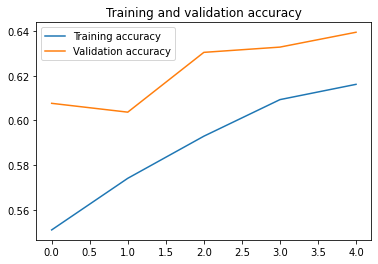

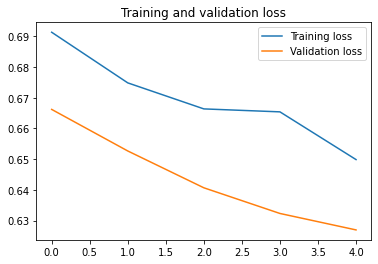

<Figure size 432x288 with 0 Axes>

In [157]:
import matplotlib.pyplot as plt
acc      = history.history[ 'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot( epochs, acc , label = 'Training accuracy')
plt.plot( epochs, val_acc, label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot( epochs, loss , label = 'Training loss')
plt.plot( epochs, val_loss, label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()